# My Playground


In [42]:
%%time
xmin = -2
xmax = 1
ymin = -1
ymax = 1
maxiter = 256
width = 800
def mandel(xmin,xmax,ymin,ymax,width,height,maxiter):
    pixels = []
    for i in range(height):
        y = ymin + (ymax - ymin) * i / (height - 1)
        row = []
        for j in range(width):
            x = xmin + (xmax - xmin) * j / (width - 1)
            c = complex(x,y)
            z = 0
            for k in range(maxiter):
                if abs(z) > 2.0:
                    break
                z = z*z + c
            row.append(k)
        pixels.append(row)
    return pixels

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 7.63 μs


In [45]:
%%timeit
pixels=mandel(xmin,xmax,ymin,ymax,width,width,maxiter)


4.17 s ± 96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


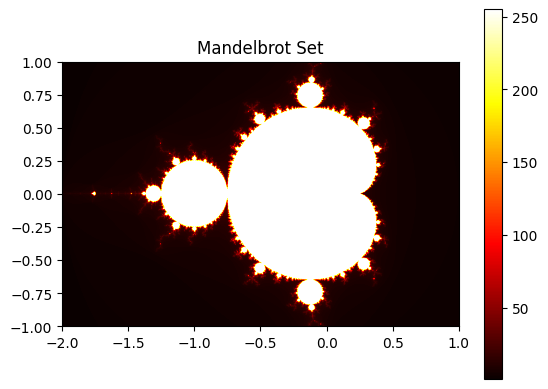

CPU times: user 198 ms, sys: 4 ms, total: 202 ms
Wall time: 201 ms


In [46]:
%%time
import matplotlib.pyplot as plt

plt.imshow(pixels, extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.colorbar()
plt.title('Mandelbrot Set')
plt.show()

In [70]:
%%time

import numpy as np

def mandel_numpy(xmin,xmax,ymin,ymax,width,height,maxiter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    c = X + 1j * Y
    z = np.zeros_like(c)
    limit = np.zeros(c.shape, dtype=np.int32)
    for k in range(maxiter):
        mask = (np.abs(z) < 10)
        limit[mask]=k
        z[mask] = z[mask]*z[mask] + c[mask]
    return z,limit

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 9.78 μs


In [71]:
z,limit = mandel_numpy(xmin,xmax,ymin,ymax,width,width,maxiter)

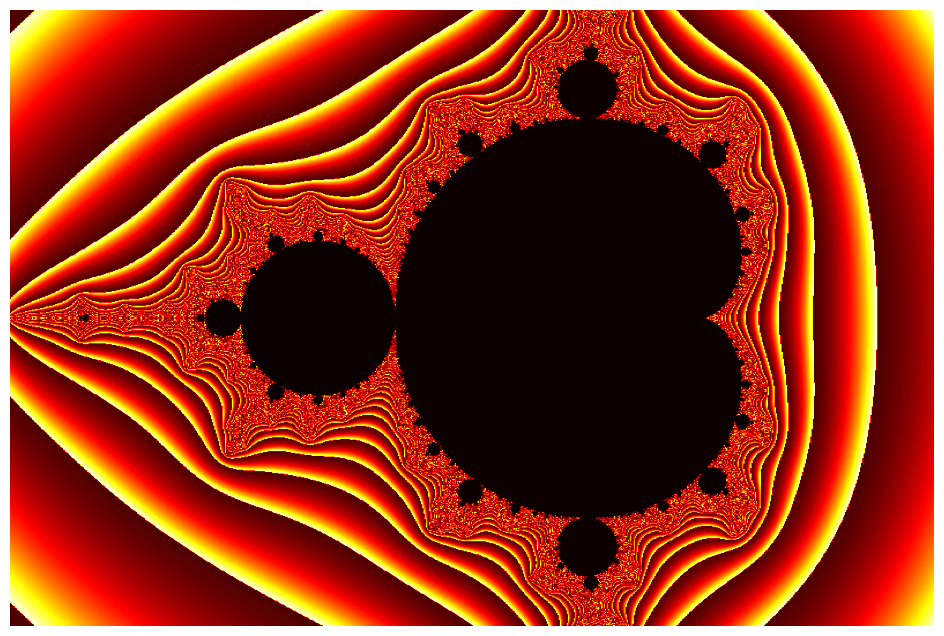

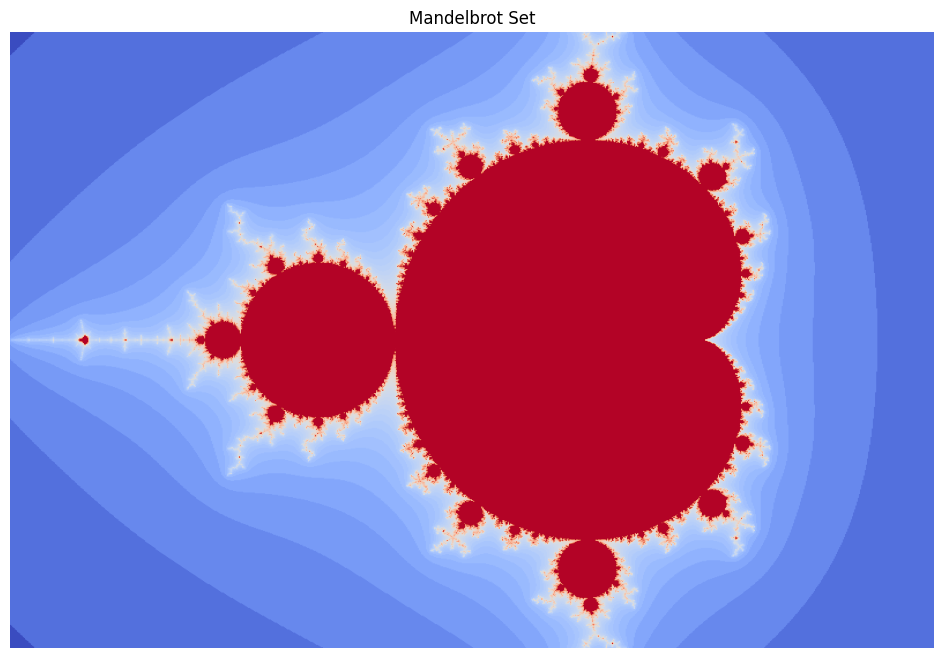

Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Grays
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
flag
flag_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_grey
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gist_yerg
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
grey
hot
hot_r
hsv
hsv_r
inferno
inferno_r
jet
jet_r
m

In [72]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(np.abs(z),extent=(xmin,xmax,ymin,ymax), cmap='hot')
plt.show()
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(np.log(np.abs(limit)+0.01),extent=(xmin,xmax,ymin,ymax), cmap='coolwarm')
plt.title('Mandelbrot Set')
plt.show()

for c in sorted(plt.colormaps()):
    print(c)
